# **COVID-19 _(2020-2021)_ Data Analysis**
# **&**
# **Future Cases Prediction**

## 1. Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import TimeSeriesSplit

from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')

## 2. Exploration and cleaning of the datasets.

### 2.1. Exploration of the dataset

In [3]:
df = pd.read_csv('Data.csv')
df

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,1804.0,35960.0,1456.0
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,2965.0,35994.0,1458.0
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.0
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.0


In [4]:
df.Entity.unique()

array(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Bulgaria', 'Canada',
       'Cape Verde', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Denmark', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Ghana', 'Greece', 'Guatemala', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Latvia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar',
       'Malawi', 'Malaysia', 'Malta', 'Mauritania', 'Mexico', 'Mongolia',
       'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'New Zealand', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Russia',

In [5]:
len(df.Entity.unique())

104

* __104__ Different Countries
---

In [6]:
df.Continent.unique()

array(['Europe', 'Africa', 'South America', 'Oceania', 'Asia',
       'North America'], dtype=object)

In [7]:
len(df.Continent.unique())

6

* __6__ Different Continents
---

In [8]:
df.shape

(38472, 15)

* __38472__ Rows

* __16__ Columns
---

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

* The existence of NaN values in Cases, Deaths, and Daily Tests
---

In [10]:
df_range = pd.to_datetime(df['Date']).agg(['min', 'max'])

df_range

min   2020-01-01
max   2021-02-28
Name: Date, dtype: datetime64[ns]

* Date ranges from the 1st January 2020 to the 28th February of the year 2021
---

In [11]:
df.describe()

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,3.847200e+04,38472.000000,38472.000000,3.057700e+04,3.821800e+04,34862.000000
mean,23.737060,20.210847,17.717145,3.165305,2.086313,19002.331415,4.896983e+07,32.751508,10.663392,3.944059e+04,2.879027e+05,8090.504733
std,26.060413,61.074922,8.134926,2.561767,1.518252,22271.107786,1.427251e+08,8.472305,6.770417,1.501847e+05,1.405243e+06,29548.753221
min,-40.900000,-106.350000,-2.000000,0.200000,0.020000,411.600000,3.412840e+05,16.000000,1.000000,-2.391720e+05,1.000000e+00,1.000000
25%,8.620000,-3.440000,11.000000,1.400000,0.820000,3659.000000,4.793900e+06,27.000000,5.000000,1.505000e+03,2.074000e+03,77.000000
50%,27.510000,21.820000,20.000000,2.500000,1.890000,8821.800000,1.148464e+07,32.000000,8.000000,5.520000e+03,2.143100e+04,527.000000
75%,45.940000,47.480000,25.000000,4.490000,3.210000,25946.200000,4.286296e+07,41.000000,16.000000,2.038200e+04,1.373770e+05,3480.500000
max,64.960000,179.410000,29.000000,13.050000,7.520000,114704.600000,1.339180e+09,48.000000,28.000000,2.945871e+06,2.860567e+07,513091.000000


### 2.2 Data Cleaning :
Imputing NaN values using interpolation

In [12]:
# Applying the imputation strategy

# Forward fill for 'Daily tests' to maintain temporal integrity
df['Daily tests'].fillna(method='ffill', inplace=True)

# Interpolation for 'Cases' to account for gradual changes
df['Cases'].interpolate(method='linear', inplace=True)

# Interpolation for 'Deaths', considering the larger number of missing values
df['Deaths'].interpolate(method='linear', inplace=True)

# Check for remaining missing values after imputation
df.isna().sum()


Entity                              0
Continent                           0
Latitude                            0
Longitude                           0
Average temperature per year        0
Hospital beds per 1000 people       0
Medical doctors per 1000 people     0
GDP/Capita                          0
Population                          0
Median age                          0
Population aged 65 and over (%)     0
Date                                0
Daily tests                         0
Cases                              13
Deaths                             15
dtype: int64

In [13]:
# Applying backward fill for the remaining missing values in 'Cases' and 'Deaths'
df['Cases'].fillna(method='bfill', inplace=True)
df['Deaths'].fillna(method='bfill', inplace=True)

# Re-check for any remaining missing values
df.isna().sum()


Entity                             0
Continent                          0
Latitude                           0
Longitude                          0
Average temperature per year       0
Hospital beds per 1000 people      0
Medical doctors per 1000 people    0
GDP/Capita                         0
Population                         0
Median age                         0
Population aged 65 and over (%)    0
Date                               0
Daily tests                        0
Cases                              0
Deaths                             0
dtype: int64

---
Dropping Duplicates

In [14]:
df = df.drop_duplicates()

---
Converting Date column to datetime format

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

---
## 3. Exploratory Data Analysis (EDA) :
Poltting the correlation between our relevant features

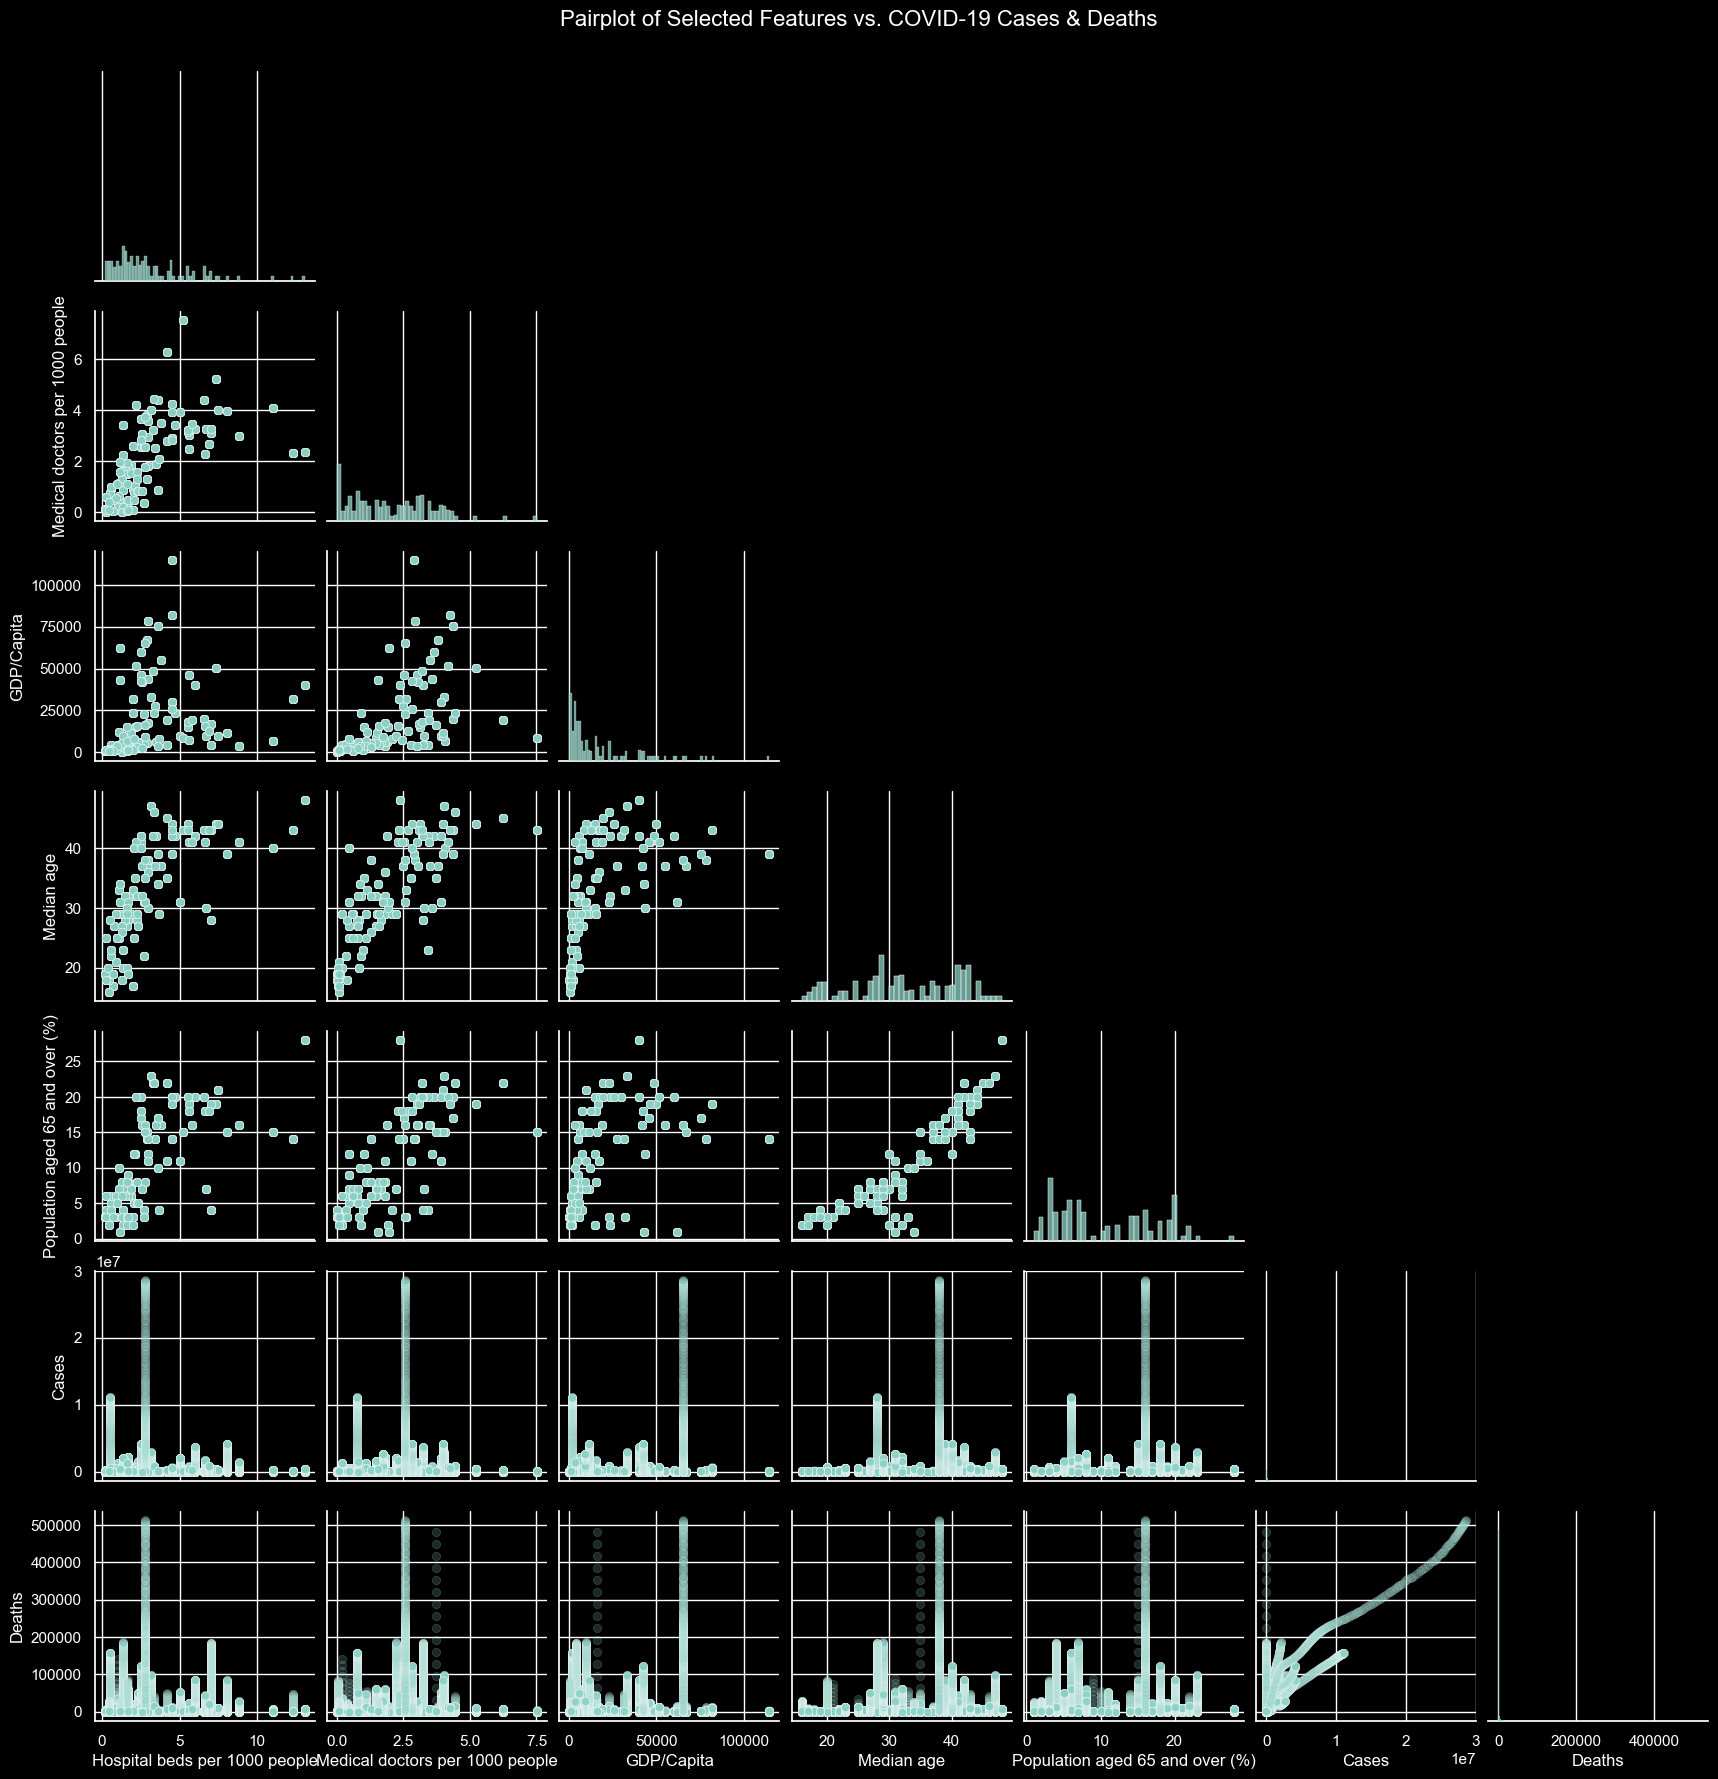

In [16]:
# Selecting a subset of the dataframe for pairplot analysis to make it more interpretable
subset_df = df[['Hospital beds per 1000 people', 'Medical doctors per 1000 people', 'GDP/Capita', 'Median age', 'Population aged 65 and over (%)', 'Cases', 'Deaths']].dropna()

# Set the aesthetic style of the plots
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Generating a pairplot to visualize the relationships between the selected features
sns.pairplot(subset_df, corner=True, plot_kws={'alpha':0.2}, palette='bright')
plt.suptitle('Pairplot of Selected Features vs. COVID-19 Cases & Deaths', size=16, y=1.02)
plt.show()

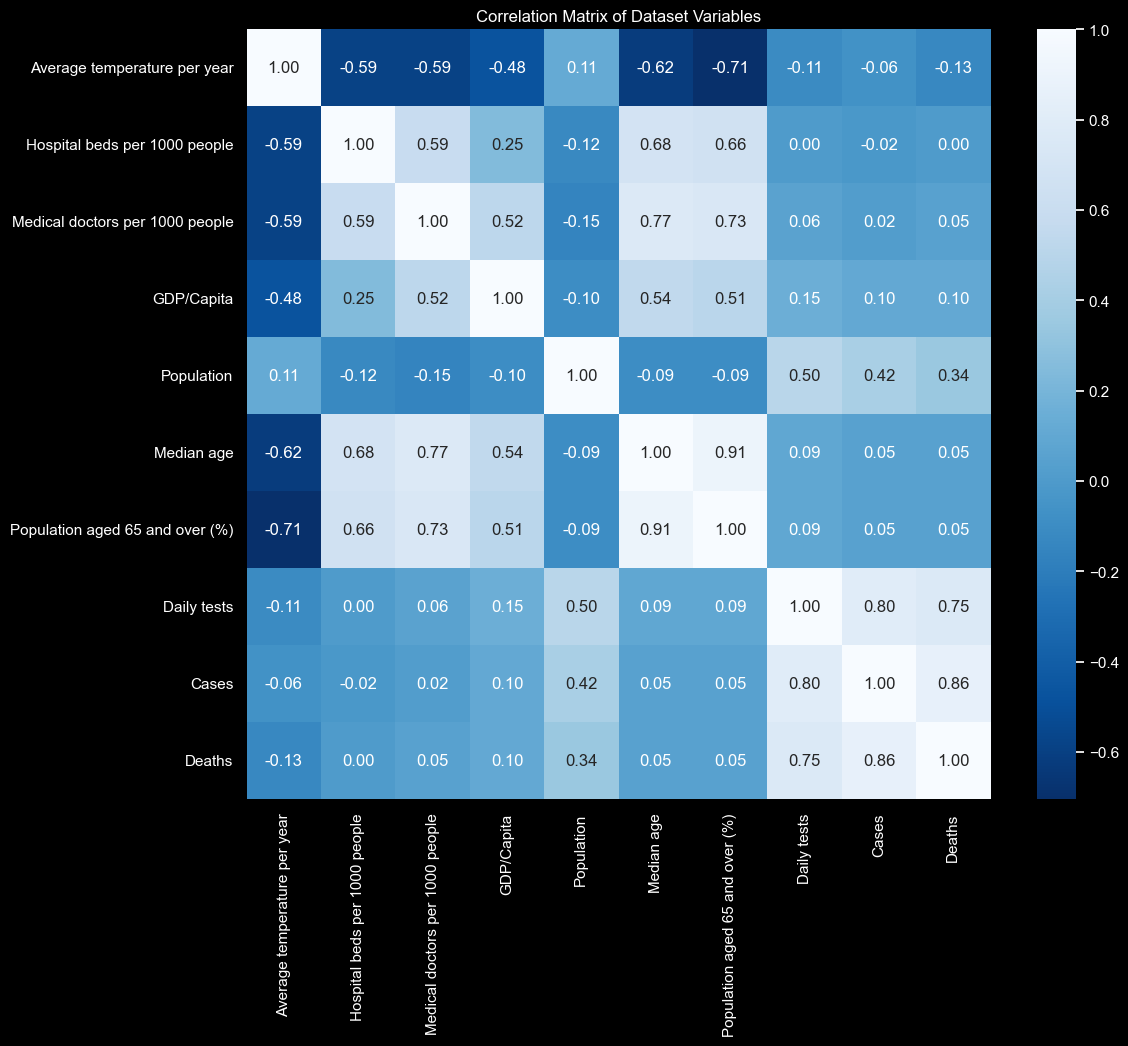

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['Average temperature per year', 'Hospital beds per 1000 people',
                                 'Medical doctors per 1000 people', 'GDP/Capita', 'Population',
                                 'Median age', 'Population aged 65 and over (%)',
                                 'Daily tests', 'Cases', 'Deaths']].corr()



# Setting the style for the plot
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix_plot = sns.heatmap(correlation_matrix, annot=True, cmap="Blues_r", fmt=".2f")
plt.title('Correlation Matrix of Dataset Variables')
plt.show()

The correlation matrix visualizes the relationship between various variables in the dataset. Here's a breakdown of key insights:

#### Strong Correlations:
* __Cases and Deaths (0.86)__: This strong positive correlation indicates that as the number of COVID-19 cases increases, the number of deaths tends to increase as well, which is expected given the nature of the pandemic.

* __Daily Tests and Cases (0.80), Daily Tests and Deaths (0.75)__: These strong positive correlations suggest that regions with more extensive testing report higher numbers of cases and deaths. This may reflect both the spread of the virus and the level of response in terms of testing capacity.

* __Median Age and Population Aged 65 and Over (0.91)__: A strong positive correlation shows that countries with a higher median age typically have a larger percentage of the population aged 65 and over. This relationship underscores demographic patterns related to aging populations.

#### Moderate to Weak Correlations:
* __GDP/Capita and Healthcare Resources__: Moderate positive correlations with hospital beds (0.38) and medical doctors (0.43) per 1000 people suggest that wealthier countries tend to have better healthcare resources. However, the correlation isn't extremely strong, indicating other factors also play significant roles.

* __Population and COVID-19 Metrics__: The population shows moderate positive correlations with Daily Tests (0.50), Cases (0.42), and Deaths (0.38). This indicates that larger populations tend to have higher absolute numbers of tests, cases, and deaths, but the relationship isn't perfectly linear, suggesting effective response measures can mitigate impacts regardless of population size

## **Trend Analysis of COVID-19 Cases and Deaths**

### 1. Monthly Cases and Deaths by Continent

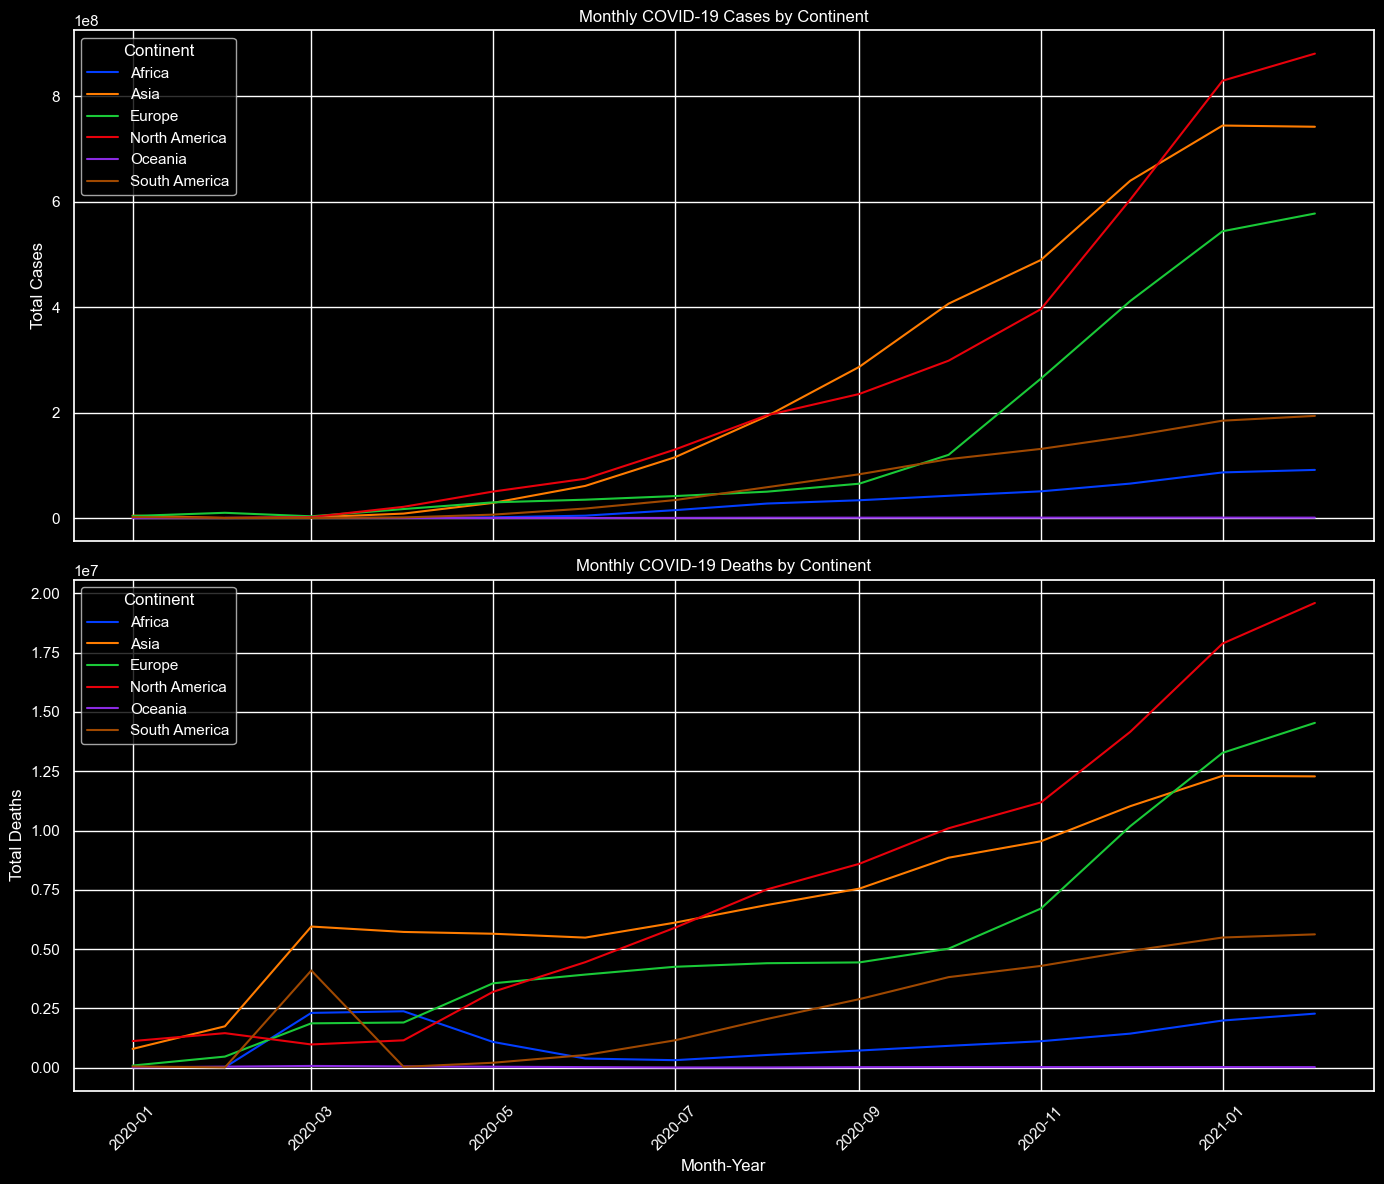

In [18]:
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Creating a 'Month-Year' column for grouping the data by month
df['Month-Year'] = df['Date'].dt.to_period('M')

# Grouping data by 'Continent' and 'Month-Year' and summing up cases and deaths
monthly_data = df.groupby(['Continent', 'Month-Year']).agg({'Cases':'sum', 'Deaths':'sum'}).reset_index()

# Ensuring that 'Cases' and 'Deaths' are numeric
monthly_data['Cases'] = pd.to_numeric(monthly_data['Cases'], errors='coerce')
monthly_data['Deaths'] = pd.to_numeric(monthly_data['Deaths'], errors='coerce')

# Correcting 'Month-Year' for plotting purposes by converting it back to datetime (the first day of each month)
monthly_data['Month-Year'] = monthly_data['Month-Year'].dt.to_timestamp()

# Replotting with corrected data types
fig, ax = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Plotting Cases
sns.lineplot(data=monthly_data, x='Month-Year', y='Cases', hue='Continent', ax=ax[0], palette='bright')
ax[0].set_title('Monthly COVID-19 Cases by Continent')
ax[0].set_ylabel('Total Cases')
ax[0].tick_params(axis='x', rotation=45)

# Plotting Deaths
sns.lineplot(data=monthly_data, x='Month-Year', y='Deaths', hue='Continent', ax=ax[1], palette='bright')
ax[1].set_title('Monthly COVID-19 Deaths by Continent')
ax[1].set_ylabel('Total Deaths')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### 2. Monthly Cases and Deaths Globally

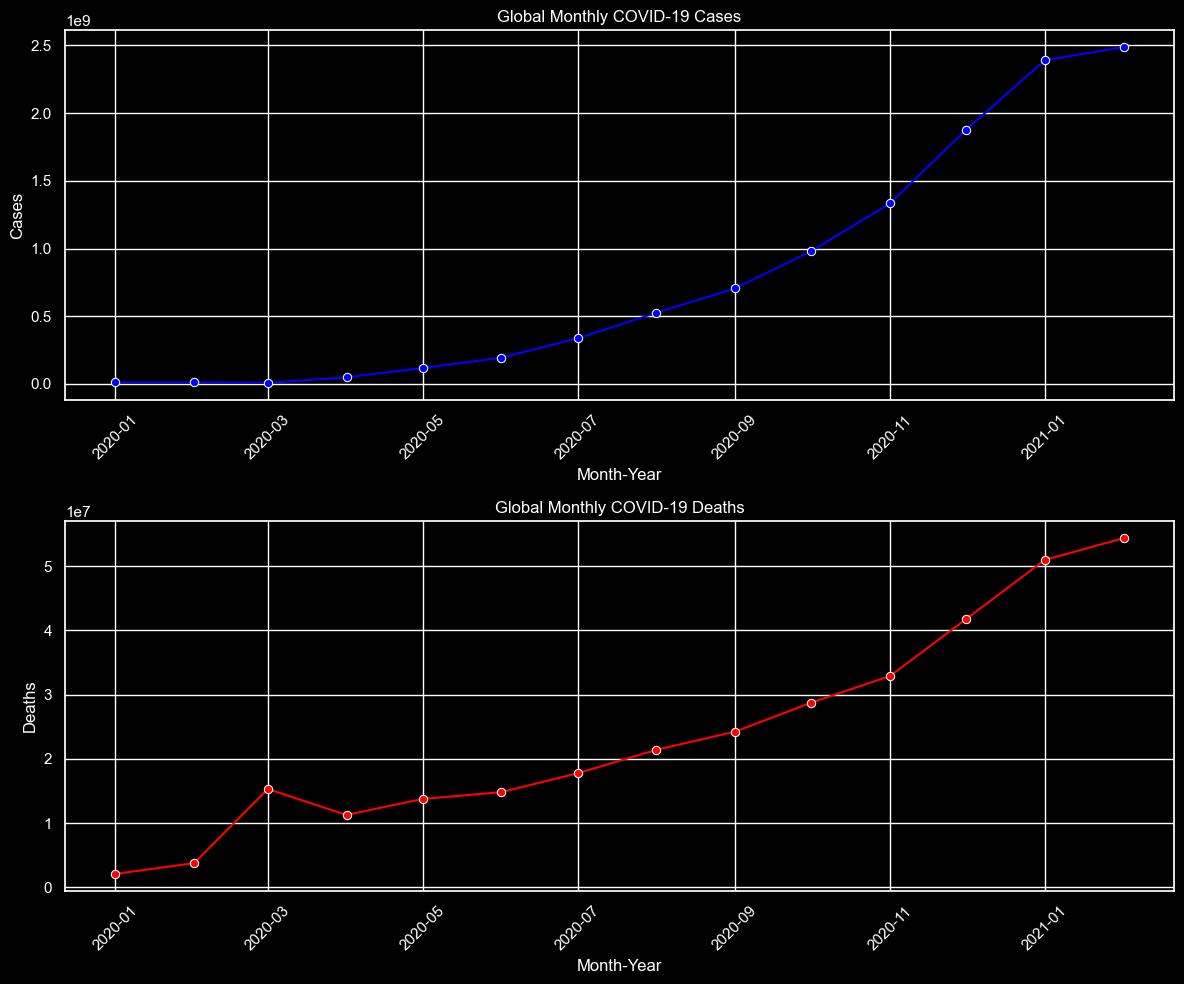

In [19]:
# Aggregating global monthly data for cases and deaths
global_monthly_data = df.groupby('Month-Year').agg({'Cases':'sum', 'Deaths':'sum'}).reset_index()

# Converting 'Month-Year' to a datetime format for plotting
global_monthly_data['Month-Year'] = global_monthly_data['Month-Year'].dt.to_timestamp()

# Plotting global trends
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

sns.lineplot(data=global_monthly_data, x='Month-Year', y='Cases', ax=ax[0], color='blue', marker='o')
ax[0].set_title('Global Monthly COVID-19 Cases')
ax[0].set_ylabel('Cases')
ax[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=global_monthly_data, x='Month-Year', y='Deaths', ax=ax[1], color='red', marker='o')
ax[1].set_title('Global Monthly COVID-19 Deaths')
ax[1].set_ylabel('Deaths')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### __Understanding the peak that occurred between 2020-02 & 2020-04__

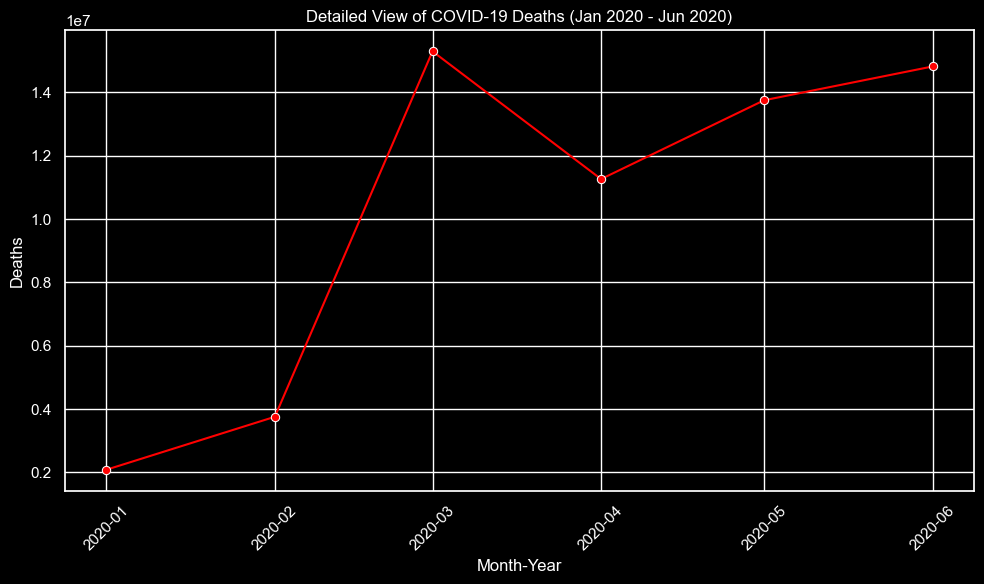

In [20]:
# Focusing on the period around the initial peak for a closer examination of the deaths
# Isolating data around March 2020 for a detailed view
focused_period_deaths = global_monthly_data[(global_monthly_data['Month-Year'] >= '2020-01') & (global_monthly_data['Month-Year'] <= '2020-06')]

# Plotting the focused period for deaths
plt.figure(figsize=(10, 6))
sns.lineplot(data=focused_period_deaths, x='Month-Year', y='Deaths', color='red', marker='o')
plt.title('Detailed View of COVID-19 Deaths (Jan 2020 - Jun 2020)')
plt.ylabel('Deaths')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### ___Conclusions___
* __Global Awareness__: March 2020 is when many governments and populations began to realize the severity of the pandemic, leading to lockdowns and emergency health measures.

* __Lag Effect__: There's typically a lag between case detection, hospitalizations, and deaths, which means the actions (or inactions) in early 2020 began to show their consequences around this time.

* __Rapid Spread__: In the early stages of the pandemic COVID-19 was spreading rapidly across continents, leading to increased fatalities.



_source:_

https://www.who.int/data/stories/the-true-death-toll-of-covid-19-estimating-global-excess-mortality

https://en.wikipedia.org/wiki/Timeline_of_the_COVID-19_pandemic_in_March_2020

https://ourworldindata.org/covid-deaths

# Top 10 Countries with the highest Cases & Deaths

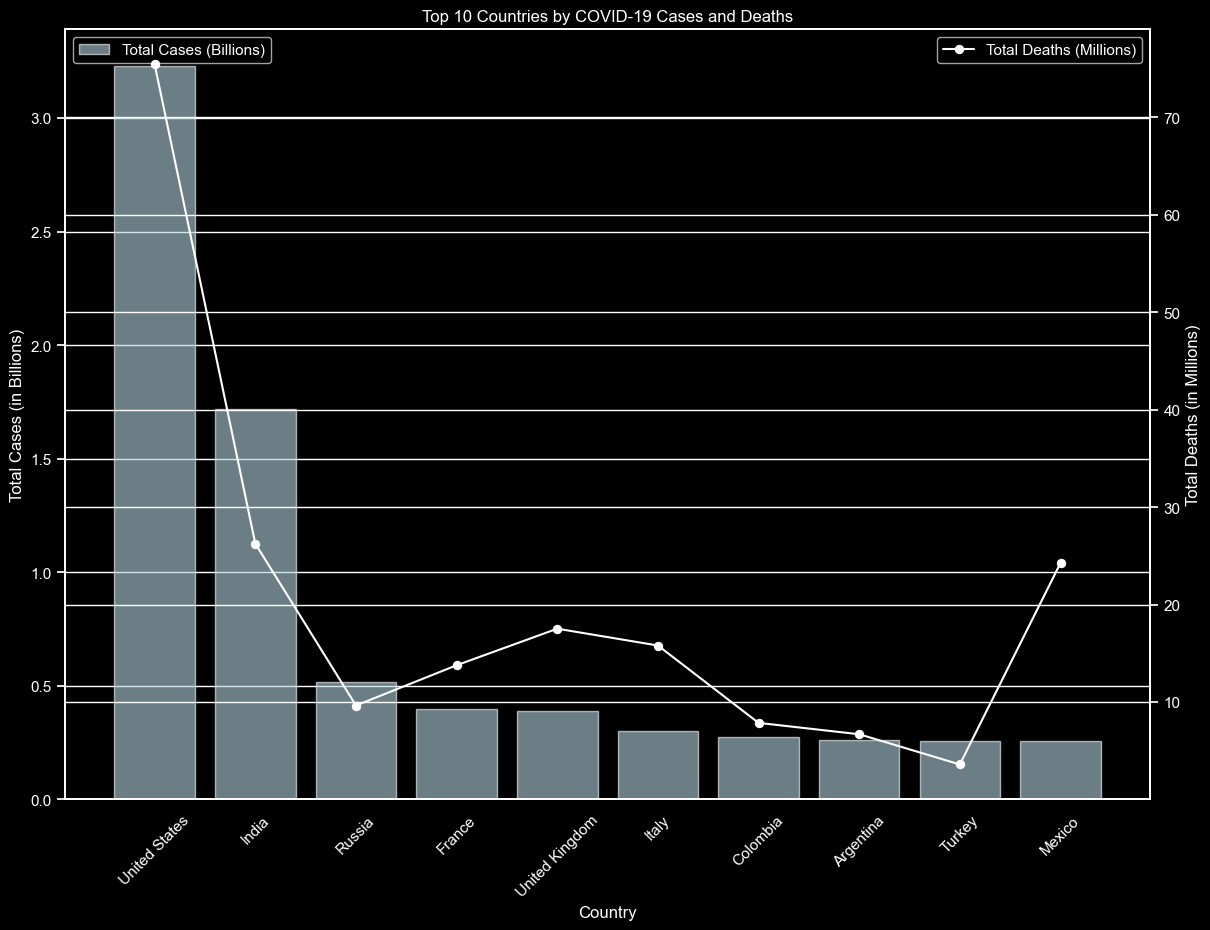

In [21]:
# Preparing the dataset

# Summing up cases and deaths for each country
country_aggregates = df.groupby('Entity').agg(
    Total_Cases=('Cases', 'sum'),
    Total_Deaths=('Deaths', 'sum'),
    Population=('Population', 'mean') # Assuming population is constant for simplicity
).reset_index()

'''
1) df.groupby('Entity'): This part groups the DataFrame by the 'Entity' column. Each 'Entity' represents a different country, so the operation is preparing to perform some calculation for each country.

2) .agg(...) : The agg function allows you to apply one or more operations to the grouped data. Inside the agg function, a dictionary is used where keys will become column names in the resulting DataFrame and values are tuples defining the operations.

3) Total_Cases=('Cases', 'sum'): This creates a new column Total_Cases in the resulting DataFrame by summing up all the values in the 'Cases' column for each country.

4) Total_Deaths=('Deaths', 'sum'): Similarly, this creates a new column Total_Deaths by summing up all the values in the 'Deaths' column for each country.

5) Population=('Population', 'mean'): This calculates the mean of the 'Population' column for each country. 

6) .reset_index(): This resets the index of the resulting DataFrame. After the group-by operation, the 'Entity' column becomes the index of the new DataFrame. reset_index() will make 'Entity' a column again and introduce a standard integer index.
'''

'''
Why we assumed population is constant and used the mean:
    * Using the mean simplifies calculations. Instead of adjusting the population for each entry (which could vary day to day with births, deaths, migration, etc.), taking the average provides a single, stable figure to work with.
    * When comparing across countries, using an average ensures that the same metric (population) is used consistently for all countries, which makes the comparisons fair and the calculations simpler.
'''






# Combining top cases and deaths into one dataframe for plotting
top_cases_and_deaths = country_aggregates.nlargest(10, 'Total_Cases')

'''
The .nlargest method in pandas is a tool to select the top n rows with the highest values in a certain column.
When you use df.nlargest(n, 'column_name'), it will return a DataFrame containing the n rows from df that have the highest values in column_name.
'''




# 1e6 is the scientific notation for 1,000,000 (1 Million)
# 1e9 is the scientific notation for 1,000,000,000 (1 Billion)
top_cases_and_deaths['Total_Deaths_in_Millions'] = top_cases_and_deaths['Total_Deaths'] / 1e6
top_cases_and_deaths['Total_Cases_in_Billions'] = top_cases_and_deaths['Total_Cases'] / 1e9

# Plotting
plt.figure(figsize=(14, 10))

# Creating a bar plot for the cases
bar = sns.barplot(x='Entity', y='Total_Cases_in_Billions', data=top_cases_and_deaths,
                  color='lightblue', alpha=0.6, label='Total Cases (Billions)')

# Creating a line plot for the deaths, using a secondary y-axis
line = bar.twinx()
sns.lineplot(x='Entity', y='Total_Deaths_in_Millions', data=top_cases_and_deaths, 
             color='white', marker='o', label='Total Deaths (Millions)', ax=line)

bar.set_title('Top 10 Countries by COVID-19 Cases and Deaths')
bar.set_xlabel('Country')
bar.set_ylabel('Total Cases (in Billions)')
line.set_ylabel('Total Deaths (in Millions)')
bar.set_xticklabels(bar.get_xticklabels(), rotation=45)
bar.legend(loc='upper left')
line.legend(loc='upper right')

plt.show()


**Note** : _(The bar chart represents total cases, while the line chart with markers indicates total deaths for these countries)_

#### _**Key Insights**_:
* **Correlation Between Cases and Deaths**: There's a clear visual correlation between the number of reported cases and deaths across these countries. Higher case counts generally correlate with higher death tolls, underscoring the deadly nature of the virus, especially in contexts with overwhelmed healthcare systems or high-risk populations.

* **Variation in Death Rates**: While all top countries have high case numbers, there's noticeable variation in the death rates. Some countries have higher deaths relative to their case counts, which could point to varying levels of healthcare capacity, differences in population demographics, or the effectiveness of the countries' response strategies.

* **Response Measures**: Indirectly, the plot also offers insights into the effectiveness of different countries' response measures. Countries with lower death rates despite high case counts may have had more effective healthcare responses or mitigation strategies.



# Global distribution of COVID-19 Deaths & Cases

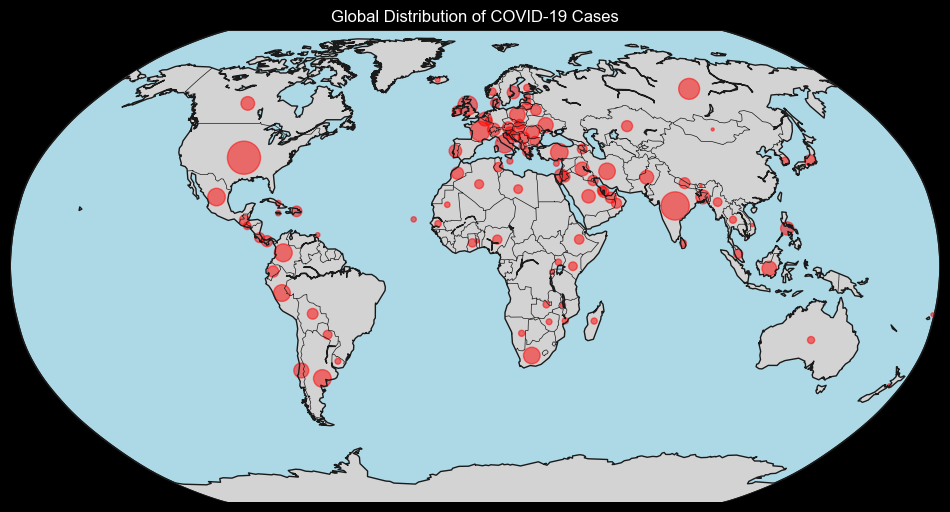

In [22]:
# Aggregating total COVID-19 cases by country for the latest available data point
country_cases = df.groupby(['Entity', 'Latitude', 'Longitude'])['Cases'].sum().reset_index()

# Setting up the map with Basemap
plt.figure(figsize=(12, 8))
m = Basemap(projection='robin', lat_0=0, lon_0=0)

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')

# Convert the latitude and longitude to x and y coordinates
x, y = m(country_cases['Longitude'].values, country_cases['Latitude'].values)

# Plotting
scatter = m.scatter(x, y, s=np.sqrt(country_cases['Cases']) / 100, c='red', alpha=0.5)

plt.title('Global Distribution of COVID-19 Cases')
plt.show()


 __Note :__ _(The red dots indicate the number of deaths and cases that occurred in each country. They don't indicate the area or zone of spreading)_

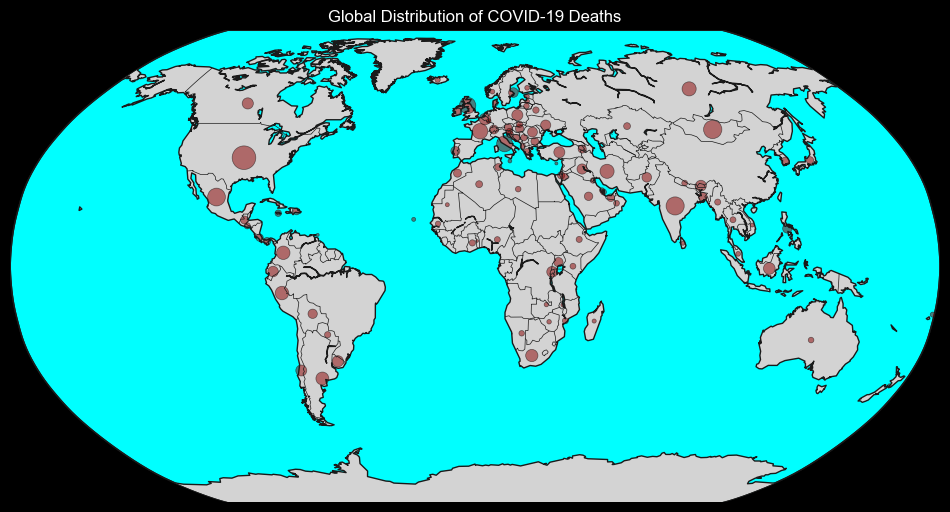

In [23]:
# Aggregating total COVID-19 deaths by country for the latest available data point
country_deaths = df.groupby(['Entity', 'Latitude', 'Longitude'])['Deaths'].sum().reset_index()

# Setting up the map with Basemap for deaths
plt.figure(figsize=(12, 8))
m = Basemap(projection='robin', lat_0=0, lon_0=0)

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

# Convert the latitude and longitude to x and y coordinates for plotting deaths
x, y = m(country_deaths['Longitude'].values, country_deaths['Latitude'].values)

# Plotting
scatter = m.scatter(x, y, s=np.sqrt(country_deaths['Deaths']) / 30, c='darkred', alpha=0.5, edgecolors='black', linewidth=0.5)

plt.title('Global Distribution of COVID-19 Deaths')
plt.show()


In [24]:
# Aggregating total deaths and cases by continent
continent_deaths = df.groupby('Continent')['Deaths'].sum().reset_index()
continent_cases = df.groupby('Continent')['Cases'].sum().reset_index()


display(continent_deaths)
continent_cases

,Continent,Deaths
0,Africa,15524181.0
1,Asia,99912029.5
2,Europe,74671176.0
3,North America,107315770.5
4,Oceania,457566.5
5,South America,35201964.0


,Continent,Cases
0,Africa,4.206555e+08
1,Asia,3.723511e+09
2,Europe,2.175135e+09
3,North America,3.719593e+09
4,Oceania,7.884048e+06
5,South America,9.817798e+08


__Note__: 

_The notation 0e+00 is a scientific notation used to express very large or very small numbers succinctly_

_(e.g. 5e+09 means 5 x 10^9. The e stands for exponent, indicating that the number is to be multiplied by 10 raised to the power of 9.)_

## Total Cases

* __Africa__: 420,655,500 cases
* __Asia__: 3,723,511,000 cases
* __Europe__: 2,175,135,000 cases
* __North America__: 3,719,593,000 cases
* __Oceania__: 7,884,048 cases
* __South America__: 981,779,800 cases

## Total Deaths

* __Africa__: 15,524,181 deaths
* __Asia__: 99,912,029 deaths
* __Europe__: 74,671,176 deaths
* __North America__: 107,315,770 deaths
* __Oceania__: 457,566 deaths
* __South America__: 35,201,964 deaths


---
# Data Preprocessing Steps

### 1. Check Daily Records for Each Country:
   Determine if each country has a record for every day


In [25]:
def count_records_by_country(df):
    country_counts = df.groupby('Entity')['Date'].nunique()
    country_counts.dropna(inplace=True)
    return country_counts.info()

### 2. Filtering Out Countries with Incomplete Records:**
   Countries that do not have daily records will be dropped from the analysis to maintain consistency and data integrity

In [26]:
count_records_by_country(df)

<class 'pandas.core.series.Series'>
Index: 104 entries, Albania to Zimbabwe
Series name: Date
Non-Null Count  Dtype
--------------  -----
104 non-null    int64
dtypes: int64(1)
memory usage: 1.6+ KB


**Insights:**  No country will be dropped since they all have daily records

### 3. Isolating Countries by Continent:
Separate the dataset by continent to handle geographical differences.

In [27]:
df_continents = {continent: data for continent, data in df.groupby('Continent')}
# Displaying the keys to confirm the segmentation
df_continents.keys()

dict_keys(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])

In [28]:
# We splitted separate dataframes for each continent
df_continents = {continent: df[df['Continent'] == continent] for continent in df['Continent'].unique()}

# Aggregating dataframe for each continent by date as index, including the mean
df_aggregated = {continent: df.groupby('Date').agg({
    'Cases': 'mean',
    'Deaths': 'mean',
    'Average temperature per year': 'mean',
    'Hospital beds per 1000 people': 'mean',
    'Medical doctors per 1000 people': 'mean',
    'GDP/Capita': 'mean',
    'Population': 'mean',
    'Median age': 'mean',
    'Population aged 65 and over (%)': 'mean'
}).reset_index() for continent, df in df_continents.items()}
for continent, df in df_aggregated.items():
    df_aggregated[continent] = df.set_index('Date')



---
# **_Final Step: Machine Learning (ML)_**
__Predicting next month's COVID-19 Cases for each of the selected a Continents__


---
* ### First: Data Splitting
    - Splitting the data into train and test sets, using time-series split (TSCV) for each of selected Continents.

* ### Second: Model Selection
    - For time-series prediction, models like ARIMA, Prophet, XGB could be suitable. For comparing reasons, we will use LinearRegression.

* ### Third: Model Training and Validation
    * Training model on the train set and validate its performance on the training and testing set using (MAE , MSE , RMSE , R2).


### **Europe Dataset**

In [29]:

df_europe = df_aggregated['Europe']
df_europe.head()

,Cases,Deaths,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%)
Date,,,,,,,,,
2020-01-24,318053.758065,6607.578804,10.5,5.255,3.745,61243.8,37792332.5,42.5,19.5
2020-01-25,307452.516129,6431.157609,10.5,5.255,3.745,61243.8,37792332.5,42.5,19.5
2020-01-26,3.000000,645.347826,13.0,5.980,3.240,40493.9,67118648.0,42.0,20.0
2020-01-27,296850.774194,6238.627717,10.5,5.255,3.745,61243.8,37792332.5,42.5,19.5
2020-01-28,286249.532258,6062.206522,10.5,5.255,3.745,61243.8,37792332.5,42.5,19.5


Train MAE: 12170.045966915108
Test MAE: 21503.427755886383
Train MSE: 245875911.5851505
Test MSE: 484436633.68904924
Train RMSE: 15680.43084819899
Test RMSE: 22009.921255857535
Train R2: 0.9358023272368581
Test R2: -14.41183817057774
Train MAE: 7384.244760212622
Test MAE: 69227.32264360935
Train MSE: 157705503.88149095
Test MSE: 8895799047.11968
Train RMSE: 12558.085199642936
Test RMSE: 94317.54368684375
Train R2: 0.9191401647584166
Test R2: -0.7206236497343768
Train MAE: 29755.026293939707
Test MAE: 143513.89741137947
Train MSE: 1451219777.7626157
Test MSE: 20770007409.218586
Train RMSE: 38094.87862905742
Test RMSE: 144118.03290781687
Train R2: 0.667997320030981
Test R2: -0.7588749790812688


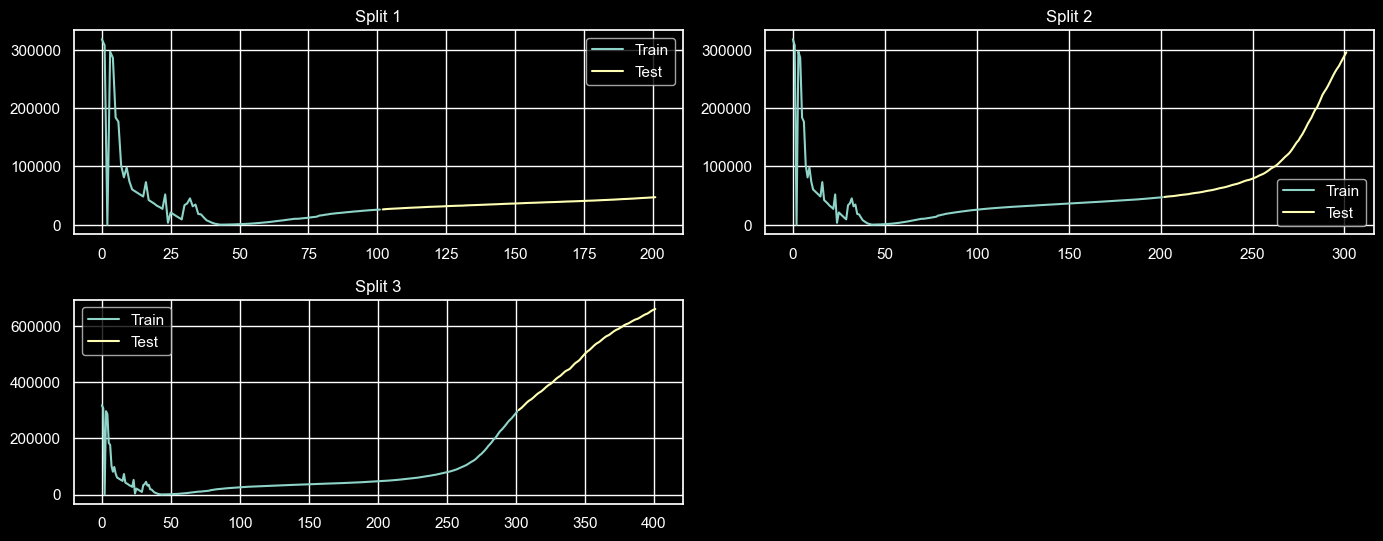

In [30]:
def train_and_evaluate_for_europe(df_europe):
    # Defining our target and Explanatory variables
    X = df_europe.drop(['Cases'], axis=1).values
    y = df_europe['Cases'].values

    # instantiating TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=3)

    # Splitting the data
    train_indices = []
    test_indices = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        train_indices.append(train_index)
        test_indices.append(test_index)

        # Model training
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Evaluation
        print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
        print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

        print("Train MSE:", mean_squared_error(y_train, y_pred_train))
        print("Test MSE:", mean_squared_error(y_test, y_pred_test))

        print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
        print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
        
        print("Train R2:", r2_score(y_train, y_pred_train))
        print("Test R2:", r2_score(y_test, y_pred_test))
        
    # Visualizing the splits
    plt.figure(figsize=(14, 8))
    for i, (train_index, test_index) in enumerate(zip(train_indices, test_indices), start=1):
        plt.subplot(3, 2, i)
        plt.plot(train_index, y[train_index], label="Train")
        plt.plot(test_index, y[test_index], label="Test")
        plt.title(f"Split {i}")
        plt.legend()
    plt.tight_layout()
    plt.show()
# Assuming df_europe is your DataFrame
train_and_evaluate_for_europe(df_europe)

---
### **Asia Dataset**

In [31]:
df_asia = df_aggregated['Asia']
df_asia.head()

,Cases,Deaths,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%)
Date,,,,,,,,,
2020-01-04,524102.666667,9791.175439,27.0,2.1,0.47,7806.7,69037513.0,40.0,12.0
2020-01-05,493273.333333,9616.350877,27.0,2.1,0.47,7806.7,69037513.0,40.0,12.0
2020-01-06,462444.000000,9441.526316,27.0,2.1,0.47,7806.7,69037513.0,40.0,12.0
2020-01-08,431614.666667,9266.701754,27.0,2.1,0.47,7806.7,69037513.0,40.0,12.0
2020-01-09,400785.333333,9091.877193,27.0,2.1,0.47,7806.7,69037513.0,40.0,12.0


Train MAE: 29772.551716703216
Test MAE: 76546.92630037156
Train MSE: 3398740115.19056
Test MSE: 7876058684.624489
Train RMSE: 58298.71452434058
Test RMSE: 88747.1615581281
Train R2: 0.7549210610461297
Test R2: -2.458527472725837
Train MAE: 43795.89405520405
Test MAE: 292908.0904531685
Train MSE: 3531975670.3475037
Test MSE: 97284875667.98016
Train RMSE: 59430.42714256312
Test RMSE: 311905.23507626506
Train R2: 0.5745043006799362
Test R2: -5.6733235418343195
Train MAE: 67258.79340652146
Test MAE: 90899.79747627406
Train MSE: 8523635637.423529
Test MSE: 8957900019.342728
Train RMSE: 92323.5378298705
Test RMSE: 94646.18333214884
Train R2: 0.7390622617562089
Test R2: 0.3564311669908171


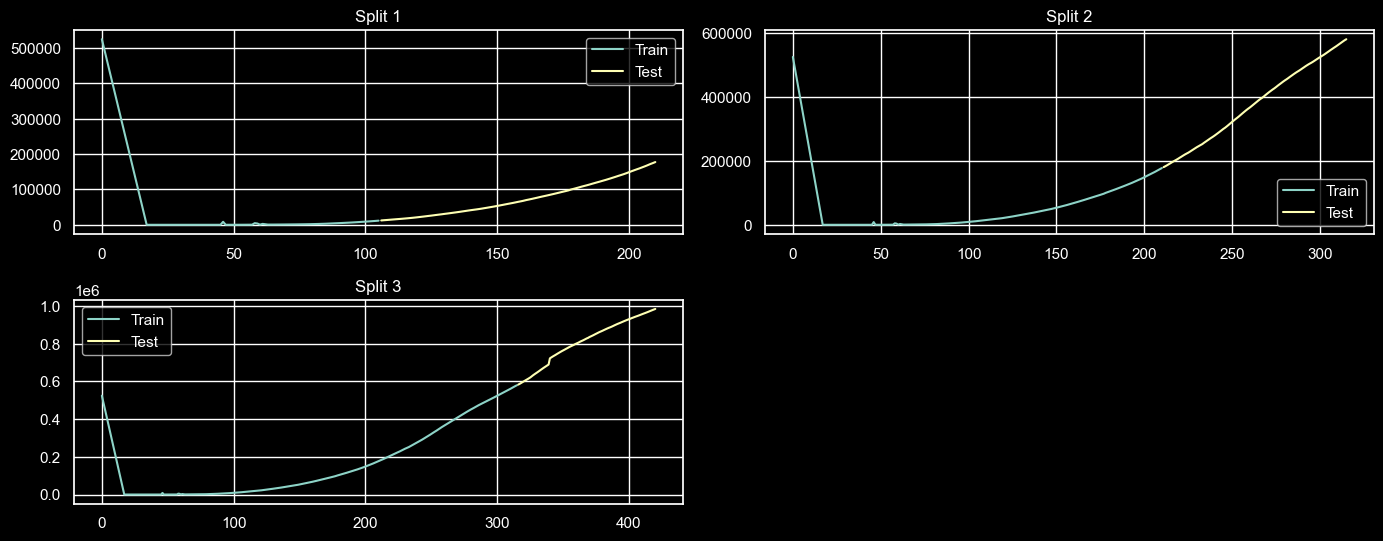

In [32]:
def train_and_evaluate_for_asia(df_asia):
    # Defining our target and Explanatory variables
    X = df_asia.drop(['Cases'], axis=1).values
    y = df_asia['Cases'].values

    # instantiating TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=3)

    # Splitting the data
    train_indices = []
    test_indices = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        train_indices.append(train_index)
        test_indices.append(test_index)

        # Model training
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Evaluation
        print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
        print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

        print("Train MSE:", mean_squared_error(y_train, y_pred_train))
        print("Test MSE:", mean_squared_error(y_test, y_pred_test))

        print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
        print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
        
        print("Train R2:", r2_score(y_train, y_pred_train))
        print("Test R2:", r2_score(y_test, y_pred_test))
    
    # Visualizing the splits
    plt.figure(figsize=(14, 8))
    for i, (train_index, test_index) in enumerate(zip(train_indices, test_indices), start=1):
        plt.subplot(3, 2, i)
        plt.plot(train_index, y[train_index], label="Train")
        plt.plot(test_index, y[test_index], label="Test")
        plt.title(f"Split {i}")
        plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming df_europe is your DataFrame
train_and_evaluate_for_asia(df_asia)

---
### **North America Dataset**

In [33]:
df_north_america = df_aggregated['North America']
df_north_america.head()

,Cases,Deaths,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%)
Date,,,,,,,,,
2020-01-01,16915.372881,435.430380,22.0,1.38,2.23,9946.0,129163276.0,29.0,7.0
2020-01-02,16623.745763,429.860759,22.0,1.38,2.23,9946.0,129163276.0,29.0,7.0
2020-01-03,16332.118644,424.291139,22.0,1.38,2.23,9946.0,129163276.0,29.0,7.0
2020-01-04,16040.491525,418.721519,22.0,1.38,2.23,9946.0,129163276.0,29.0,7.0
2020-01-05,15748.864407,413.151899,22.0,1.38,2.23,9946.0,129163276.0,29.0,7.0


Train MAE: 6448.69483164083
Test MAE: 202339.86761640373
Train MSE: 133884775.3142405
Test MSE: 53582061716.38741
Train RMSE: 11570.858884034516
Test RMSE: 231477.99402186682
Train R2: 0.49633103386353217
Test R2: -3.2090453539030035
Train MAE: 56639.83796085585
Test MAE: 399558.14086343284
Train MSE: 6012362783.882468
Test MSE: 177448539984.3604
Train RMSE: 77539.42728626817
Test RMSE: 421246.41242906795
Train R2: 0.6702085156837313
Test R2: -4.82706860819594
Train MAE: 83985.7787603881
Test MAE: 854503.9650595838
Train MSE: 16324832160.474302
Test MSE: 811490908442.9153
Train RMSE: 127768.6665832993
Test RMSE: 900827.9016787364
Train R2: 0.8579808868615115
Test R2: -1.484587488975695


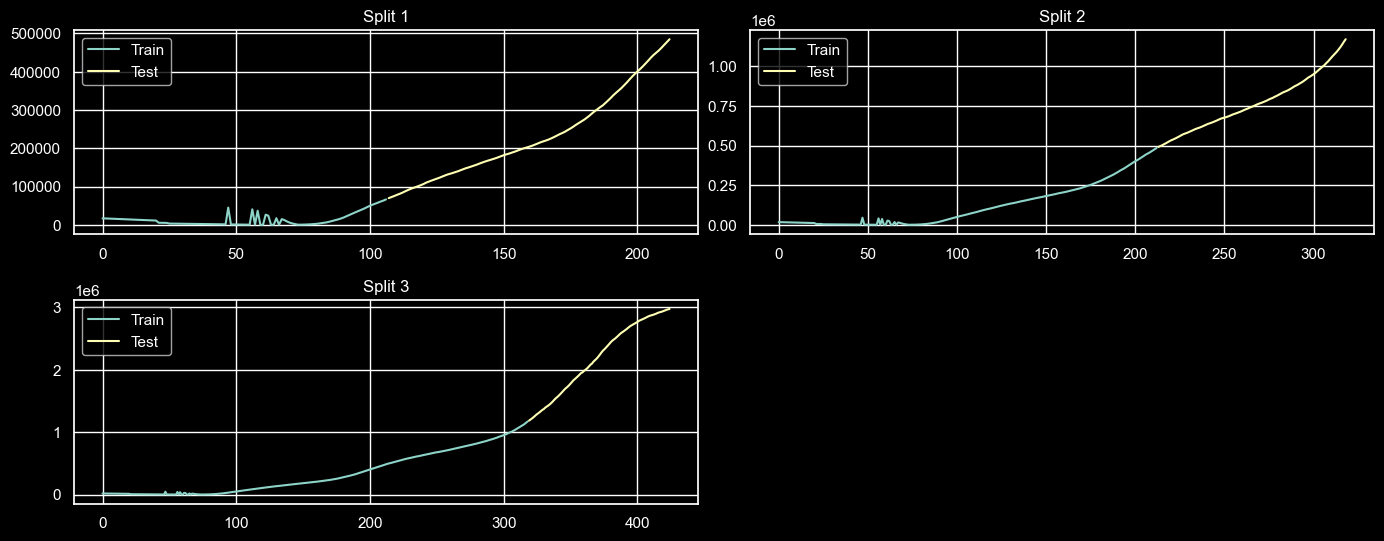

In [34]:
def train_and_evaluate_for_north_america(df_north_america):
    # Defining our target and Explanatory variables
    X = df_north_america.drop(['Cases'], axis=1).values
    y = df_north_america['Cases'].values

    # instantiating TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=3)

    # Splitting the data
    train_indices = []
    test_indices = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        train_indices.append(train_index)
        test_indices.append(test_index)

        # Model training
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Evaluation
        print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
        print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

        print("Train MSE:", mean_squared_error(y_train, y_pred_train))
        print("Test MSE:", mean_squared_error(y_test, y_pred_test))

        print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
        print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
        
        print("Train R2:", r2_score(y_train, y_pred_train))
        print("Test R2:", r2_score(y_test, y_pred_test))
    
    # Visualizing the splits
    plt.figure(figsize=(14, 8))
    for i, (train_index, test_index) in enumerate(zip(train_indices, test_indices), start=1):
        plt.subplot(3, 2, i)
        plt.plot(train_index, y[train_index], label="Train")
        plt.plot(test_index, y[test_index], label="Test")
        plt.title(f"Split {i}")
        plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming df_europe is your DataFrame
train_and_evaluate_for_north_america(df_north_america)


**Insights:** The LinearRegression performs bad on our data since the nature of the model is not meant to predict time-series tasks

**Potential Solutions:** Using more complex models that captures time-series like ARIMA, SARIMAX, Prophet

---
# **_Using more complex model_**: Prophet by Facebook

In [35]:
#pip install prophet


In [36]:
'''
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, r2_score

# Defining a function to make predictions for each continent
def predict_cases_continents(df_dict, n_splits=3):
    predictions = {}  # here we store the results of the predictions for each continent.
    scores_train = {}  # we store evaluation scores for each continent on train set
    scores_test = {}  # we store evaluation scores for each continent on test set
    for continent, df in df_continents.items():
        # preprocessing
        df_prophet = df.reset_index().rename(columns={'Date': 'ds', 'Cases': 'y'})
        for i in range(n_splits):
            train = df_prophet[df_prophet.index < int((i+1)*(len(df_prophet)/n_splits))]
            test = df_prophet[(df_prophet.index >= int((i+1)*(len(df_prophet)/n_splits))) & (df_prophet.index < int((i+2)*(len(df_prophet)/n_splits)))]
            # initialising and fitting the model
            model = Prophet(daily_seasonality='auto', yearly_seasonality='auto', weekly_seasonality='auto')
            model.fit(train)
            # making predictions for train set
            forecast_train = model.predict(train)
            # here we stored the predictions for train set
            if continent not in predictions:
                predictions[continent] = {'train': [], 'test': []}
            predictions[continent]['train'].append(forecast_train[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
            # evaluation on train set
            y_true_train = train['y']
            y_pred_train = forecast_train['yhat']
            r2_train = r2_score(y_true_train, y_pred_train)
            mse_train = mean_squared_error(y_true_train, y_pred_train)
            mae_train = mean_absolute_error(y_true_train, y_pred_train)
            if continent not in scores_train:
                scores_train[continent] = {'R2 Score': [], 'MSE': [], 'MAE': []}
            scores_train[continent]['R2 Score'].append(r2_train)
            scores_train[continent]['MSE'].append(mse_train)
            scores_train[continent]['MAE'].append(mae_train)
            # making predictions for test set
            future_test = model.make_future_dataframe(periods=len(test))
            forecast_test = model.predict(future_test)
            # here we stored the predictions for test set
            predictions[continent]['test'].append(forecast_test[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
            # evaluation on test set
            y_true_test = test['y']
            if len(test) > 0:
                    y_pred_test = forecast_test.iloc[-len(test):]['yhat']
                    r2_test = r2_score(y_true_test, y_pred_test)
                    mse_test = mean_squared_error(y_true_test, y_pred_test)
                    mae_test = mean_absolute_error(y_true_test, y_pred_test)
            else:
                    r2_test = 0
                    mse_test = 0
                    mae_test = 0
            if continent not in scores_test:
                scores_test[continent] = {'R2 Score': [], 'MSE': [], 'MAE': []}
            scores_test[continent]['R2 Score'].append(r2_test)
            scores_test[continent]['MSE'].append(mse_test)
            scores_test[continent]['MAE'].append(mae_test)
    # this is the average evaluation scores of all the splits for our train set
    for continent in scores_train.keys():
        scores_train[continent]['R2 Score'] = sum(scores_train[continent]['R2 Score']) / n_splits
        scores_train[continent]['MSE'] = sum(scores_train[continent]['MSE']) / n_splits
        scores_train[continent]['MAE'] = sum(scores_train[continent]['MAE']) / n_splits
    # this is the average evaluation scores of the all splits for our test set
    for continent in scores_test.keys():
        scores_test[continent]['R2 Score'] = sum(scores_test[continent]['R2 Score']) / n_splits
        scores_test[continent]['MSE'] = sum(scores_test[continent]['MSE']) / n_splits
        scores_test[continent]['MAE'] = sum(scores_test[continent]['MAE']) / n_splits
    return predictions, scores_train, scores_test
# dictionary of continent dataframes we created before
df_continents = {
    'Europe': df_europe,
    'North America': df_north_america,
    'Asia': df_asia,
}
# displaying the predictions for all continents and evaluation scores
continent_predictions, evaluation_scores_train, evaluation_scores_test = predict_cases_continents(df_continents)
print("Predictions for each continent:")
print(continent_predictions)
print("\nEvaluation scores for each continent on train set:")
for continent, scores in evaluation_scores_train.items():
    print(continent)
    for metric, value in scores.items():
        print(f"{metric}: {value}")
    print()
print("\nEvaluation scores for each continent on test set:")
for continent, scores in evaluation_scores_test.items():
    print(continent)
    for metric, value in scores.items():
        print(f"{metric}: {value}")
    print()
'''

'\nfrom prophet import Prophet\nfrom sklearn.metrics import mean_absolute_error, r2_score\n\n# Defining a function to make predictions for each continent\ndef predict_cases_continents(df_dict, n_splits=3):\n    predictions = {}  # here we store the results of the predictions for each continent.\n    scores_train = {}  # we store evaluation scores for each continent on train set\n    scores_test = {}  # we store evaluation scores for each continent on test set\n    for continent, df in df_continents.items():\n        # preprocessing\n        df_prophet = df.reset_index().rename(columns={\'Date\': \'ds\', \'Cases\': \'y\'})\n        for i in range(n_splits):\n            train = df_prophet[df_prophet.index < int((i+1)*(len(df_prophet)/n_splits))]\n            test = df_prophet[(df_prophet.index >= int((i+1)*(len(df_prophet)/n_splits))) & (df_prophet.index < int((i+2)*(len(df_prophet)/n_splits)))]\n            # initialising and fitting the model\n            model = Prophet(daily_seasona

In [37]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

def predict_cases_continents(df_dict, n_splits=3):
    predictions = {}
    scores_train = {}
    scores_test = {}
    tscv = TimeSeriesSplit(n_splits=n_splits)

    for continent, df in df_dict.items():
        df_prophet = df.reset_index().rename(columns={'Date': 'ds', 'Cases': 'y'})
        df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
        scores_train[continent] = []
        scores_test[continent] = []

        for train_idx, test_idx in tscv.split(df_prophet):
            train = df_prophet.iloc[train_idx]
            test = df_prophet.iloc[test_idx]
            
            # Train the model
            model = Prophet(daily_seasonality='auto', yearly_seasonality='auto', weekly_seasonality='auto')
            model.fit(train)

            # Make predictions on the training set
            forecast_train = model.predict(train[['ds']])
            
            # Make predictions on the test set
            forecast_test = model.predict(test[['ds']])
            
            # Store predictions
            predictions[continent] = {
                'train': forecast_train,
                'test': forecast_test
            }

            # Calculate scores for train set
            y_true_train = train['y']
            y_pred_train = forecast_train['yhat']
            scores_train[continent].append({
                'R2 Score': r2_score(y_true_train, y_pred_train),
                'MSE': mean_squared_error(y_true_train, y_pred_train),
                'MAE': mean_absolute_error(y_true_train, y_pred_train)
            })

            # Calculate scores for test set
            y_true_test = test['y']
            y_pred_test = forecast_test['yhat']
            scores_test[continent].append({
                'R2 Score': r2_score(y_true_test, y_pred_test),
                'MSE': mean_squared_error(y_true_test, y_pred_test),
                'MAE': mean_absolute_error(y_true_test, y_pred_test)
            })

    return predictions, scores_train, scores_test

# dictionary of continent dataframes we created before
df_continents = {
    'Europe': df_europe,
    'North America': df_north_america,
    'Asia': df_asia,
}

# displaying the predictions for all continents and evaluation scores
continent_predictions, evaluation_scores_train, evaluation_scores_test = predict_cases_continents(df_continents)

continent_predictions, evaluation_scores_train, evaluation_scores_test


17:44:48 - cmdstanpy - INFO - Chain [1] start processing
17:44:48 - cmdstanpy - INFO - Chain [1] done processing
17:44:48 - cmdstanpy - INFO - Chain [1] start processing
17:44:48 - cmdstanpy - INFO - Chain [1] done processing
17:44:48 - cmdstanpy - INFO - Chain [1] start processing
17:44:49 - cmdstanpy - INFO - Chain [1] done processing
17:44:49 - cmdstanpy - INFO - Chain [1] start processing
17:44:49 - cmdstanpy - INFO - Chain [1] done processing
17:44:49 - cmdstanpy - INFO - Chain [1] start processing
17:44:49 - cmdstanpy - INFO - Chain [1] done processing
17:44:50 - cmdstanpy - INFO - Chain [1] start processing
17:44:50 - cmdstanpy - INFO - Chain [1] done processing
17:44:50 - cmdstanpy - INFO - Chain [1] start processing
17:44:50 - cmdstanpy - INFO - Chain [1] done processing
17:44:51 - cmdstanpy - INFO - Chain [1] start processing
17:44:51 - cmdstanpy - INFO - Chain [1] done processing
17:44:51 - cmdstanpy - INFO - Chain [1] start processing
17:44:52 - cmdstanpy - INFO - Chain [1]

({'Europe': {'train':             ds          trend     yhat_lower     yhat_upper    trend_lower  \
   0   2020-01-24  100524.388828   67181.606887  137945.489664  100524.388828   
   1   2020-01-25   98815.541988   61736.121710  139410.186662   98815.541988   
   2   2020-01-26   97106.695149   57017.263735  136077.426745   97106.695149   
   3   2020-01-27   95397.848310   57947.363331  137133.560065   95397.848310   
   4   2020-01-28   93689.001471   53130.653852  134268.998634   93689.001471   
   ..         ...            ...            ...            ...            ...   
   297 2020-11-16  221488.346388  182532.349902  262983.714176  221488.346388   
   298 2020-11-17  224074.968981  181146.088922  265827.098824  224074.968981   
   299 2020-11-18  226661.591573  183303.623186  264851.575698  226661.591573   
   300 2020-11-19  229248.214165  189182.704733  267796.217365  229248.214165   
   301 2020-11-20  231834.836757  197350.025577  272782.665628  231834.836757   
   
     

* __trend:__ The underlying trend of the time series data, which is the model's long-term progression.

* __yhat_lower and yhat_upper:__ These are the lower and upper bounds of the forecast's confidence interval. They represent the range within which the actual value is expected to fall, with a certain level of confidence (typically 95%).

* __trend_lower and trend_upper:__ Similar to yhat_lower and yhat_upper, but specifically for the trend component of the model. They provide the confidence interval for the trend estimate.

* __additive_terms:__ Components of the model that are added together to make the final prediction. This could include weekly, yearly, or daily seasonality, as well as holiday effects, depending on the model configuration.

* __additive_terms_lower and additive_terms_upper:__ The lower and upper bounds of the confidence interval for the additive terms.

* __weekly, weekly_lower, weekly_upper:__ The weekly seasonality effect estimated by the model. The "_lower" and "_upper" refer to the lower and upper bounds of the confidence interval for the weekly component.

* __multiplicative_terms:__ Components that are multiplied by the trend to make the final prediction. This is used when the effect of seasonality grows or shrinks in proportion to the trend.

* __multiplicative_terms_lower and multiplicative_terms_upper:__ The confidence intervals for the multiplicative terms.

* __yhat:__ The final forecasted value (the 'hat' symbol ^ typically denotes an estimate or prediction). It's the sum of the trend, seasonality, and any other factors the model includes.


 __yhat__ is the final prediction, while __trend__ is just one component of that prediction.

### __Statistical Insights:__

In [44]:
# predictions for the beginning and end of March for each continent
europe_begin_march = 231834.836757  # yhat at the start of March for Europe
europe_end_march = 234421.820829  # yhat at the end of March for Europe

north_america_begin_march = 1060856  # yhat at the start of March for North America
north_america_end_march = 1087474  # yhat at the end of March for North America

asia_begin_march = 589849.874801  # yhat at the start of March for Asia
asia_end_march = 1009208  # yhat at the end of March for Asia

# Calculate the percentage increase for each continent
europe_increase = ((europe_end_march - europe_begin_march) / europe_begin_march) * 100
north_america_increase = ((north_america_end_march - north_america_begin_march) / north_america_begin_march) * 100
asia_increase = ((asia_end_march - asia_begin_march) / asia_begin_march) * 100

europe_increase, north_america_increase, asia_increase


(1.1158737436477526, 2.50910585414043, 71.09573861323281)

* __Europe:__ An increase of approximately __1.12%__
* __North America:__ An increase of approximately __2.51%__
* __Asia:__ A significant increase of approximately __71.10%__

### __Plotting the Predictions__

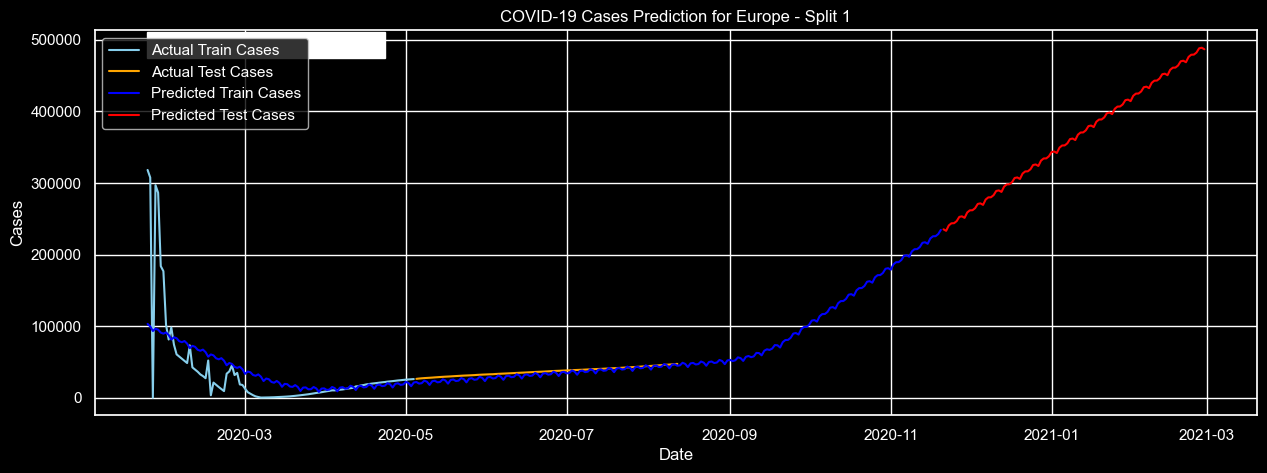

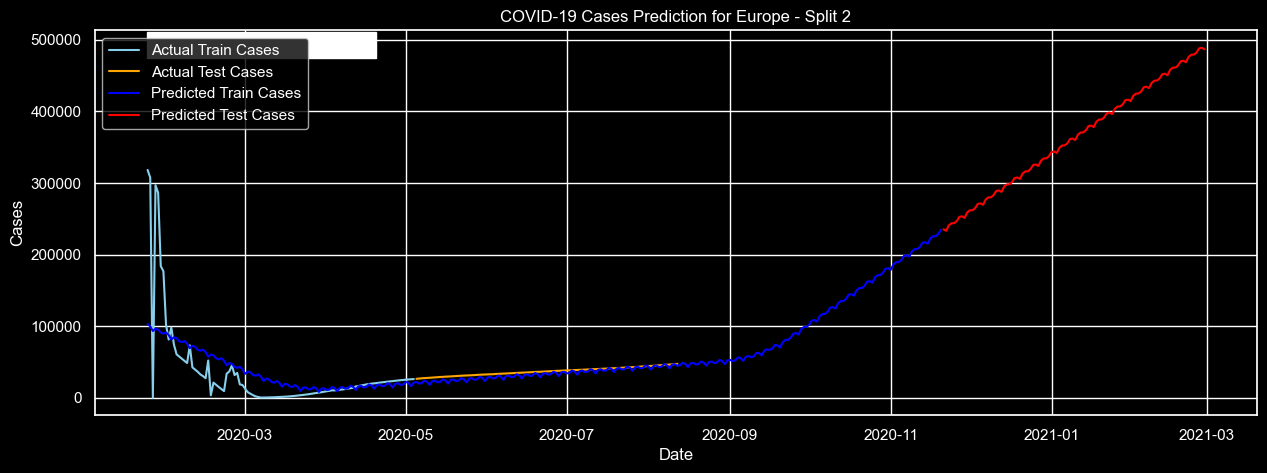

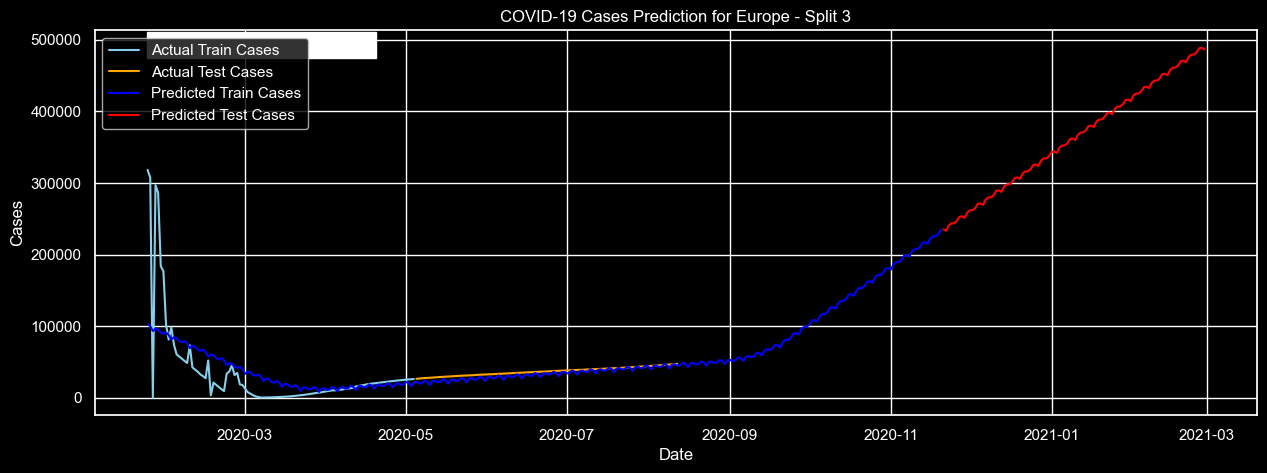

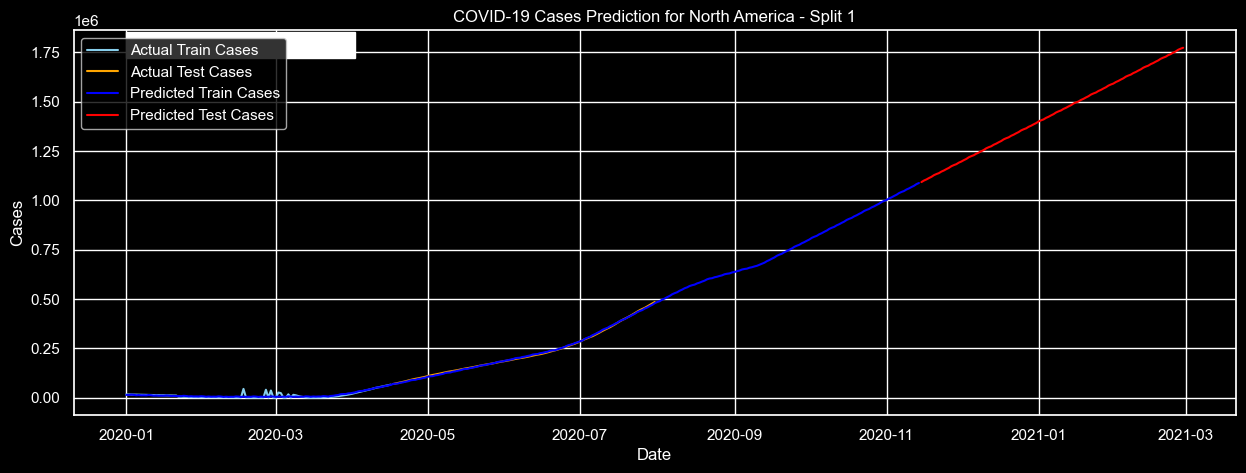

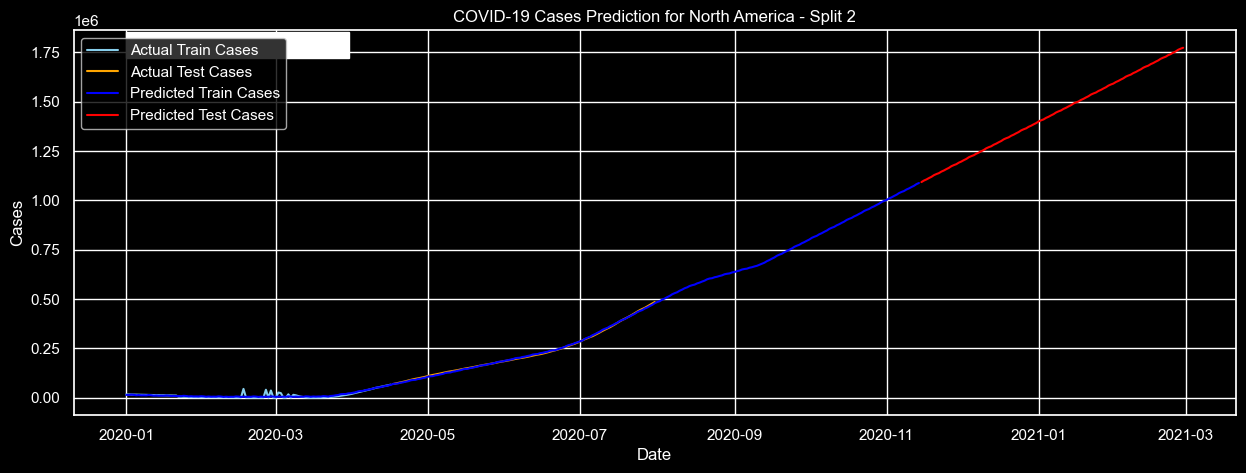

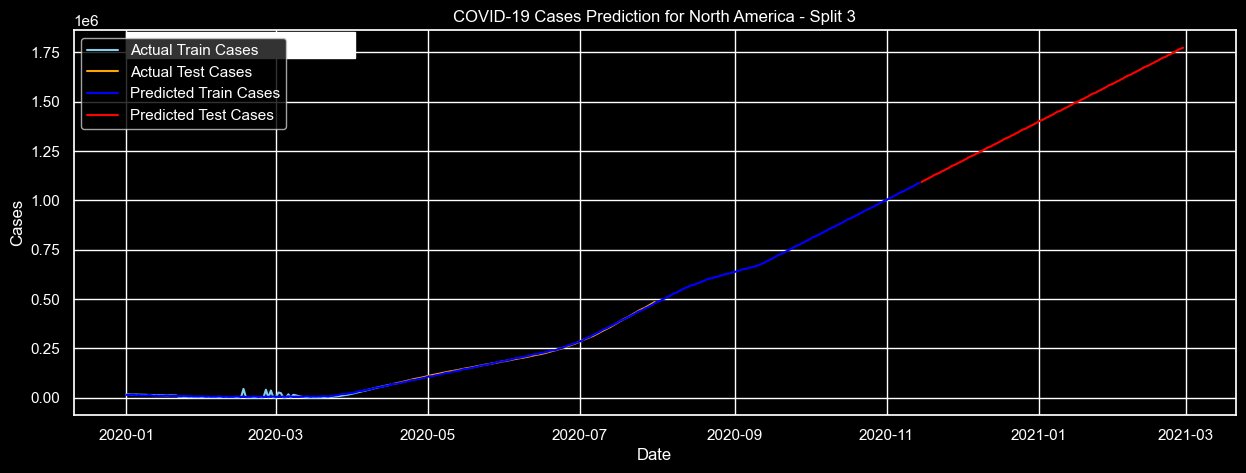

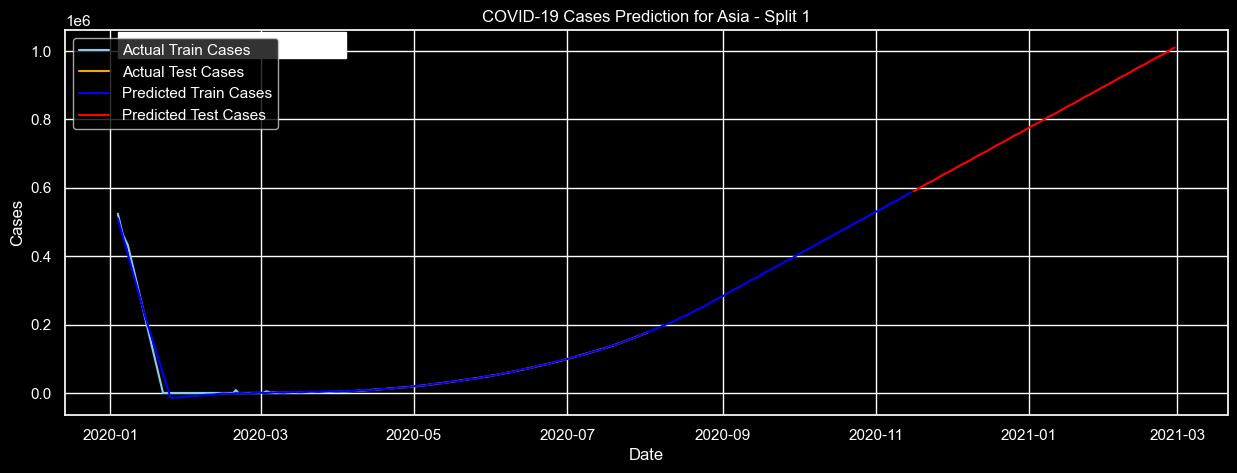

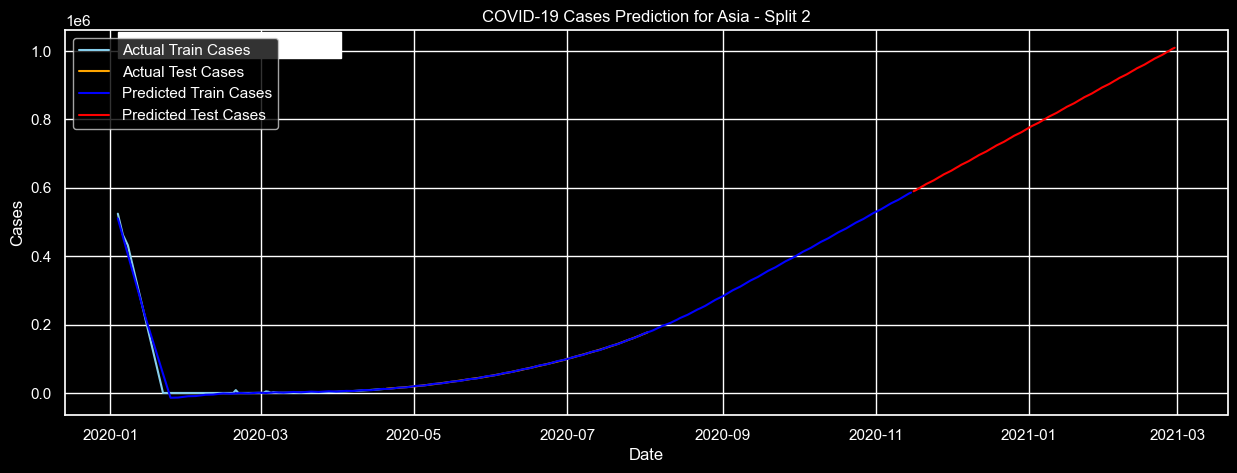

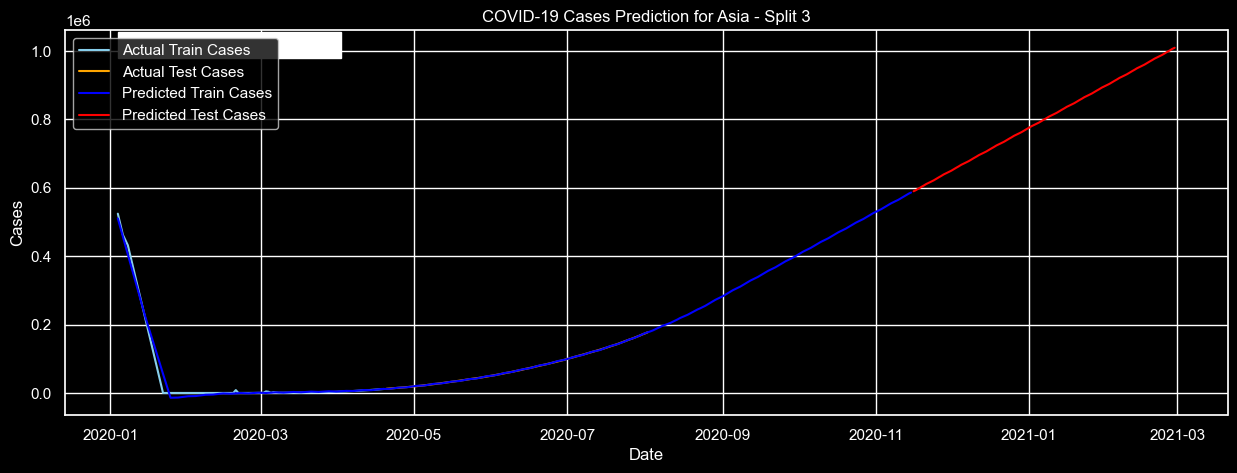

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Set up visualization styles
sns.set(style="darkgrid")
plt.style.use("dark_background")

def plot_time_series_cv(predictions, scores_train, scores_test, df_dict):
    for continent in predictions.keys():
        # Plot for each split
        for split_idx in range(len(scores_train[continent])):
            plt.figure(figsize=(15, 5))
            plt.title(f"COVID-19 Cases Prediction for {continent} - Split {split_idx+1}")

            # Get the training and test data from the original dataframe
            df = df_dict[continent]
            train_idx, test_idx = next(TimeSeriesSplit(n_splits=len(scores_train[continent])).split(df))
            train = df.iloc[train_idx]
            test = df.iloc[test_idx]

            # Plot actual cases
            plt.plot(train.index, train['Cases'], label='Actual Train Cases', color='skyblue')
            plt.plot(test.index, test['Cases'], label='Actual Test Cases', color='orange')
            
            # Plot predicted cases for training and test set
            plt.plot(predictions[continent]['train']['ds'], predictions[continent]['train']['yhat'], label='Predicted Train Cases', color='blue')
            plt.plot(predictions[continent]['test']['ds'], predictions[continent]['test']['yhat'], label='Predicted Test Cases', color='red')

            # Annotate the plot with the R2 score
            score_annotation = f"Train R2: {scores_train[continent][split_idx]['R2 Score']:.2f}, Test R2: {scores_test[continent][split_idx]['R2 Score']:.2f}"
            plt.annotate(score_annotation, xy=(0.05, 0.95), xycoords='axes fraction', backgroundcolor='white')

            plt.xlabel('Date')
            plt.ylabel('Cases')
            plt.legend()
            plt.show()

# Call the plotting function with the predictions and scores
plot_time_series_cv(continent_predictions, evaluation_scores_train, evaluation_scores_test, df_continents)


* __Note__

    * 1e6 means 1 million // 10 to the power of 6 (1,000,000)

### ___Key Insights___

__Europe:__

* The predictions follow the actual trend closely in both training and testing phases for all splits.

__North America:__

* There's a noticeable overestimation during the early pandemic months, but the model adjusts and aligns closely with the actual cases in subsequent months.

__Asia:__

* For all splits, the test predictions maintain a consistent trend, indicating the model's stability across different time frames.

## Conclusion

The model’s predictions shows the growth of COVID-19 Cases over the month of March for each continent.

 Asia’s predicted increase is notably higher, indicating a much steeper rise in cases according to the model's forecasts.